In [1]:
# Standard Imports
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

import requests

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Only required on the first run
nltk.download('vader_lexicon')
nltk.download('punkt', force=True)
nltk.download('punkt_tab')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Skoos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Skoos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Skoos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Instantiate our analyzer
sid = SentimentIntensityAnalyzer()

In [4]:
sid.polarity_scores('Bork beep no boop bap :c ')

{'neg': 0.57, 'neu': 0.43, 'pos': 0.0, 'compound': -0.6486}

# Scraping moby Text from Project Gutenberg

In [5]:
moby = requests.get('https://www.gutenberg.org/cache/epub/2701/pg2701.txt').text

In [6]:
len(moby)

1260540

In [7]:
len(sent_tokenize(moby))

9184

In [8]:
sentence_lev_sent =[]

for s in sent_tokenize(moby):
    sentence_lev_sent.append(sid.polarity_scores(s)['compound'])

In [9]:
sentence_lev_df = pd.DataFrame(
    {'Sentence': sent_tokenize(moby),
     'Sentiment': sentence_lev_sent}
)

sentence_lev_df['Sentiment_Smooth'] = sentence_lev_df['Sentiment'].rolling(10).mean()

sentence_lev_df.sample(5)

,Sentence,Sentiment,Sentiment_Smooth
7702,"no sooner dead, than death whirls round the co...",-0.9337,-0.13550
6947,"Oh, you solemn rogue, you—you Bunger!",-0.1511,0.11563
4973,CHAPTER 66.,0.0000,-0.04797
7997,I could not endure the sight; could not possib...,0.3182,0.02422
676,"Supper over, the company went back to the bar-...",0.1779,-0.12977


<Axes: ylabel='Sentiment'>

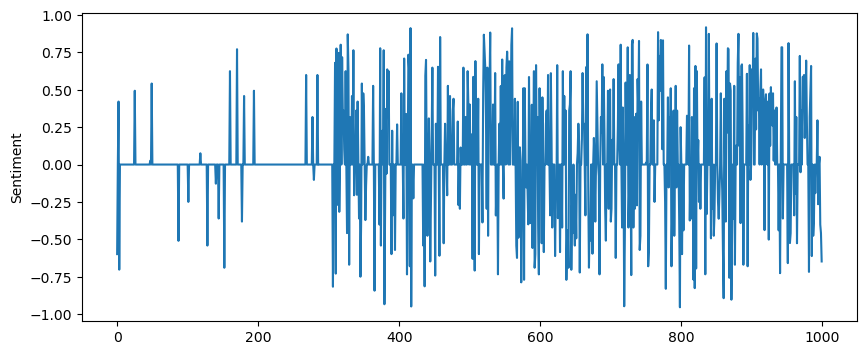

In [10]:
plt.figure(figsize=(10,4))
sns.lineplot(x=sentence_lev_df.index.tolist()[:1000], y='Sentiment', data=sentence_lev_df.iloc[:1000])

<Axes: ylabel='Sentiment_Smooth'>

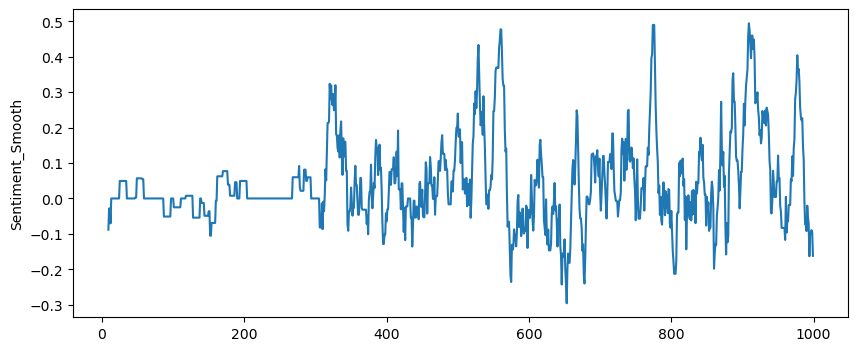

In [11]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=sentence_lev_df.index.to_list()[:1000], y='Sentiment_Smooth', data=sentence_lev_df.iloc[:1000])

## Frankenstein 1831

In [12]:
frank31 = requests.get('https://www.gutenberg.org/cache/epub/84/pg84-images.html').text

In [13]:
len(frank31)

463878

In [14]:
len(sent_tokenize(frank31))

3193

In [15]:
sentence_lev_sent2 =[]

for s in sent_tokenize(frank31):
    sentence_lev_sent2.append(sid.polarity_scores(s)['compound'])

In [16]:
sentence_lev_df2 = pd.DataFrame(
    {'Sentence': sent_tokenize(frank31),
     'Sentiment': sentence_lev_sent2}
)

sentence_lev_df2['Sentiment_Smooth31'] = sentence_lev_df2['Sentiment'].rolling(30).mean()

sentence_lev_df2.sample(5)

,Sentence,Sentiment,Sentiment_Smooth31
831,He\r\ncan no longer be a subject for pity; we ...,-0.5423,-0.106450
2069,</p>\r\n<p>\r\nWe travelled at the time of the...,0.0000,0.066150
483,I\r\nrequested his advice concerning the books...,0.0000,0.153110
708,She died on the first approach of cold weather...,-0.5574,0.033497
2850,Even where the affections are not strongly mov...,0.9235,0.222073


<Axes: ylabel='Sentiment_Smooth31'>

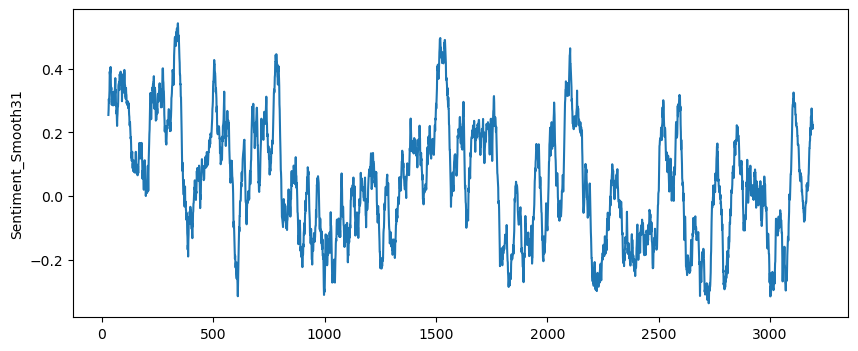

In [17]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=sentence_lev_df2.index.to_list()[:1000000], y='Sentiment_Smooth31', data=sentence_lev_df2.iloc[:1000000])

## Frankenstein 1818

In [18]:
frank18 = requests.get('https://www.gutenberg.org/files/41445/41445-h/41445-h.htm').text

In [19]:
len(frank18)

430075

In [20]:
sentence_lev_sent3 =[]

for s in sent_tokenize(frank18):
    sentence_lev_sent3.append(sid.polarity_scores(s)['compound'])

In [21]:
sentence_lev_df3 = pd.DataFrame(
    {'Sentence': sent_tokenize(frank18),
     'Sentiment': sentence_lev_sent3}
)

sentence_lev_df3['Sentiment_Smooth18'] = sentence_lev_df3['Sentiment'].rolling(30).mean()

sentence_lev_df3.sample(5)

,Sentence,Sentiment,Sentiment_Smooth18
308,"It was very different, when the masters of the...",0.0129,0.151087
59,"I have\r\nno friend, Margaret: when I am glowi...",0.7845,0.379977
484,"Your fatherâs\r\nhealth is now so vigorous, ...",0.0000,0.045563
1552,"Night was far advanced, when I came to the\r\n...",0.2500,0.005127
923,I knew\r\nthat they would remain that day at t...,-0.0772,0.054677


<Axes: ylabel='Sentiment_Smooth31'>

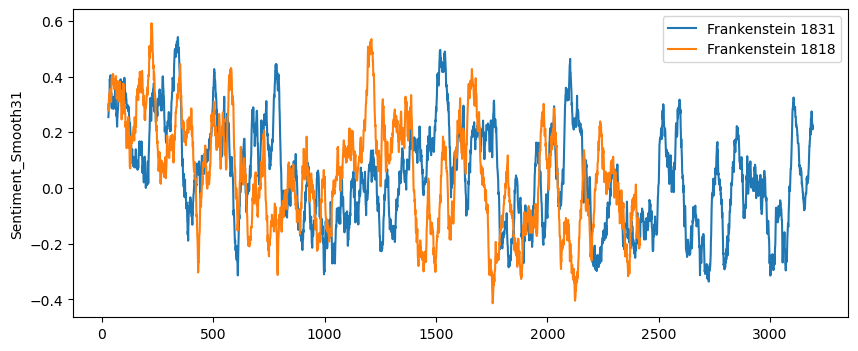

In [22]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=sentence_lev_df2.index.to_list()[:len(sent_tokenize(frank31))], y='Sentiment_Smooth31', data=sentence_lev_df2.iloc[:len(sent_tokenize(frank31))], label = 'Frankenstein 1831') #NOTE index to list is set to the length of tokenized frank31 because it is the longer of the two books for comparison
sns.lineplot(x=sentence_lev_df3.index.to_list()[:len(sent_tokenize(frank31))], y='Sentiment_Smooth18', data=sentence_lev_df3.iloc[:len(sent_tokenize(frank31))], label = 'Frankenstein 1818')


<Axes: ylabel='Sentiment_Smooth31'>

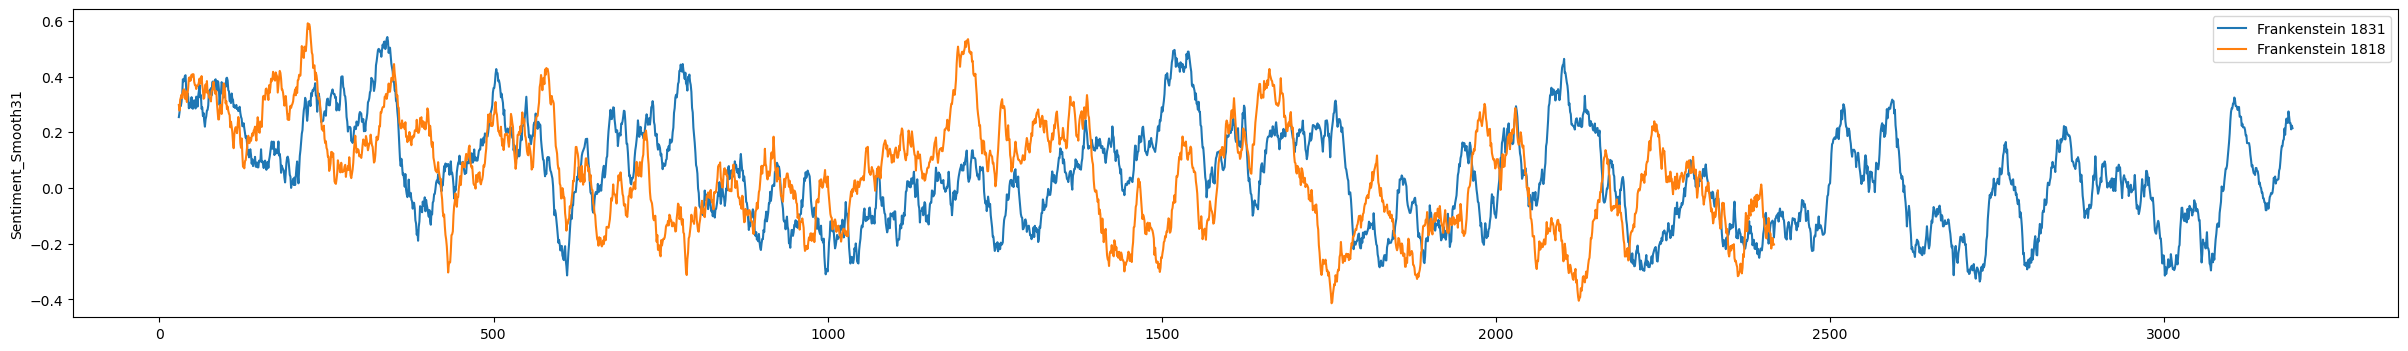

In [23]:
plt.figure(figsize=(30, 4))
sns.lineplot(x=sentence_lev_df2.index.to_list(), y='Sentiment_Smooth31', data=sentence_lev_df2, label = 'Frankenstein 1831')
sns.lineplot(x=sentence_lev_df3.index.to_list(), y='Sentiment_Smooth18', data=sentence_lev_df3, label = 'Frankenstein 1818')


The above graph shows both editions of Frankenstein in full length however, it is not particularly interpretable being that contextually both lines in the linegraph are behaving independently. This makes it difficult to analyze visual differences. In order to solve this problem, a new dataframe will be created that will randomly drop sentences from the 1831 edition to match the number of sentences in the 1818 edition. The rolling averages will smooth over the missing data points and will allow for a more interpretable graph without losing too much information. Another option is to impute artificially created n/a values.

# Investigation: Addressing the accuracy mapping between the 1831 and 1818 editions of Frankenstein

In [24]:
len(frank31) - len(frank18)

33803

Above is the difference in characers within the object. This is not particularly useful but it does highlight that incongruence between editions is expected.

In [25]:
frank31

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8"><style>\r\n#pg-header div, #pg-footer div {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    margin-left: 2em;\r\n}\r\n#pg-footer div.agate {\r\n    font-size: 90%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-footer li {\r\n    all: initial;\r\n    display: block;\r\n    margin-top: 1em;\r\n    margin-bottom: 1em;\r\n    text-indent: -0.6em;\r\n}\r\n#pg-footer div.secthead {\r\n    font-size: 110%;\r\n    font-weight: bold;\r\n}\r\n#pg-footer #project-gutenberg-license {\r\n    font-size: 110%;\r\n    margin-top: 0;\r\n    margin-bottom: 0;\r\n    text-align: center;\r\n}\r\n#pg-header-heading {\r\n    all: inherit;\r\n    text-align: center;\r\n    font-size: 120%;\r\n    font-weight:bold;\r\n}\r\n#pg-footer-heading {\r\n    all: inherit;\r\n    text-align: center;\r\n    font-size: 120%;\r\n    font-weight: normal;\r\n 

In [26]:
len(sent_tokenize(frank31)) - len(sent_tokenize(frank18))

776

In [27]:
len(sent_tokenize(frank18))

2417

In [28]:
len(sent_tokenize(frank31))

3193

# Dropping Sentences with a new Dataframe

In [29]:
df2 = frank31

In [30]:
sentence_lev_sent4 =[]

for s in sent_tokenize(frank31):
    sentence_lev_sent4.append(sid.polarity_scores(s)['compound'])

In [31]:
sentence_lev_df4 = pd.DataFrame(
    {'Sentence': sent_tokenize(frank31),
     'Sentiment': sentence_lev_sent4}
)

sentence_lev_df4['Sentiment_Smooth31_new'] = sentence_lev_df4['Sentiment'].rolling(30).mean()

sentence_lev_df4.sample(5)

,Sentence,Sentiment,Sentiment_Smooth31_new
1971,</p>\r\n<p>\r\nHis tale had occupied the whole...,0.0000,-0.007067
646,"</p>\r\n<p>\r\nBut I was in reality very ill, ...",0.8179,-0.020647
2820,"“Since you have preserved my narration,” said ...",0.0000,-0.086290
2477,"My dear son, I entreat you never to\r\nmake su...",0.7545,-0.171793
1191,The abrupt sides of vast mountains were before...,-0.1901,-0.042663


In [32]:
df3 = sentence_lev_df3 #(frank18)

In [33]:
df3.shape

(2417, 3)

In [38]:
df2_shorter = sentence_lev_df4.sample(n=df3.shape[0]).sort_index().reset_index(drop=True)

len(df2_shorter)

2417

# Linegraph with Random Dropped Data

<Axes: ylabel='Sentiment_Smooth31_new'>

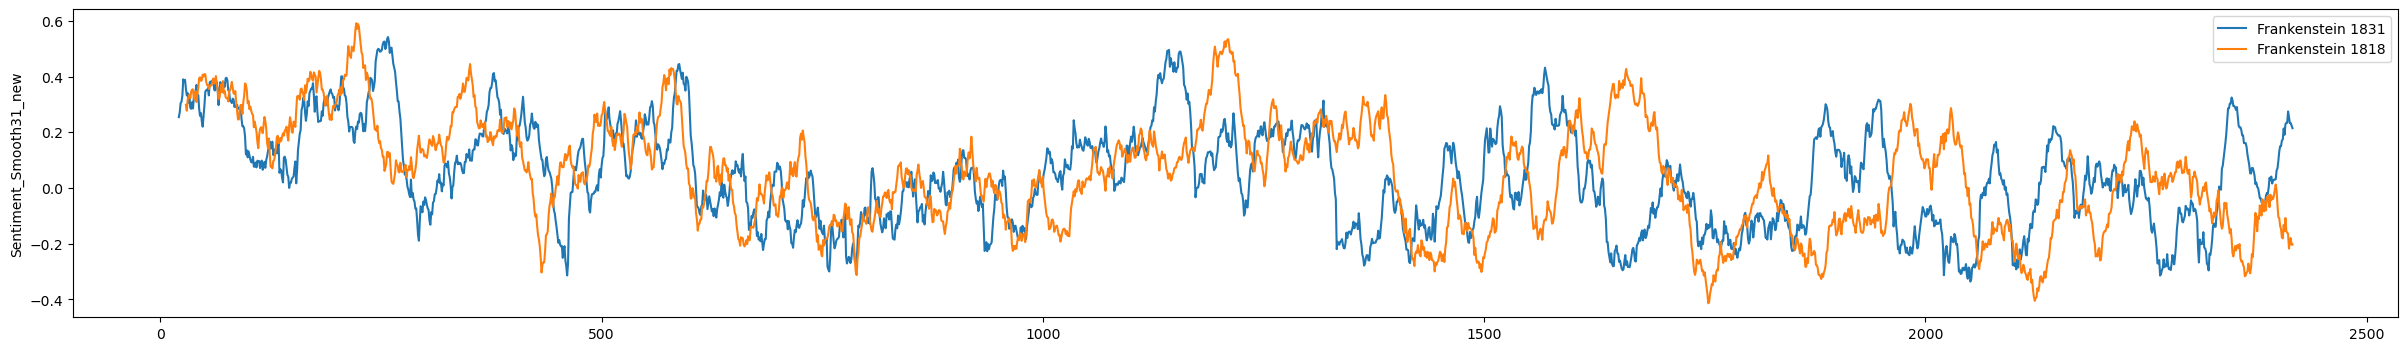

In [39]:
plt.figure(figsize=(30, 4))
sns.lineplot(x=df2_shorter.index.to_list(), y='Sentiment_Smooth31_new', data=df2_shorter, label = 'Frankenstein 1831')
sns.lineplot(x=sentence_lev_df3.index.to_list(), y='Sentiment_Smooth18', data=df3, label = 'Frankenstein 1818')


In [36]:
df2_shorter.shape

(2417, 3)

In [37]:
df2_shorter.index

Index([   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
       ...
       3182, 3183, 3184, 3185, 3186, 3188, 3189, 3190, 3191, 3192],
      dtype='int64', length=2417)

AttributeError: 'str' object has no attribute 'columns'

# inpute

using min max scale

duplicates, min max, 

In [41]:

sentence_lev_df3

,Sentence,Sentiment,Sentiment_Smooth18
0,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",0.0000,NaN
1,[CDATA[ */\r\n\r\nbody {\r\n margin-left: 1...,-0.2263,NaN
2,"]</p>\r\n\r\n\r\n\r\n\r\n<div class=""figcenter...",0.0000,NaN
3,"I.</p>\r\n\r\n<hr style=""width: 65%;"" />\r\n\r...",0.0000,NaN
4,Did I solicit thee<br />\r\nFrom darkness to p...,0.8143,NaN
...,...,...,...
2412,"I shall ascend my funeral pile triumphantly, a...",-0.7184,-0.217723
2413,The light of that conflagration will fade\r\na...,0.0000,-0.194070
2414,My spirit will\r\nsleep in peace; or if it thi...,0.4203,-0.180060
2415,Farewell.â</p>\r\n\r\n<p>He sprung from the ...,0.0000,-0.204560


In [42]:
sentence_lev_df3.index

RangeIndex(start=0, stop=2417, step=1)

In [43]:
new_index = sentence_lev_df3.index.to_list()

In [45]:
scale_factor = 3193 / 2417
scale_factor

1.3210591642532064

In [46]:
new_index = [int(i * scale_factor) for i in new_index]

In [49]:
len(new_index) == len(set(new_index))

True

In [51]:
sentence_lev_df3.index = new_index
sentence_lev_df3

,Sentence,Sentiment,Sentiment_Smooth18
0,"<!DOCTYPE html>\r\n<html xmlns=""http://www.w3....",0.0000,NaN
1,[CDATA[ */\r\n\r\nbody {\r\n margin-left: 1...,-0.2263,NaN
2,"]</p>\r\n\r\n\r\n\r\n\r\n<div class=""figcenter...",0.0000,NaN
3,"I.</p>\r\n\r\n<hr style=""width: 65%;"" />\r\n\r...",0.0000,NaN
5,Did I solicit thee<br />\r\nFrom darkness to p...,0.8143,NaN
...,...,...,...
3186,"I shall ascend my funeral pile triumphantly, a...",-0.7184,-0.217723
3187,The light of that conflagration will fade\r\na...,0.0000,-0.194070
3189,My spirit will\r\nsleep in peace; or if it thi...,0.4203,-0.180060
3190,Farewell.â</p>\r\n\r\n<p>He sprung from the ...,0.0000,-0.204560


<Axes: ylabel='Sentiment_Smooth31'>

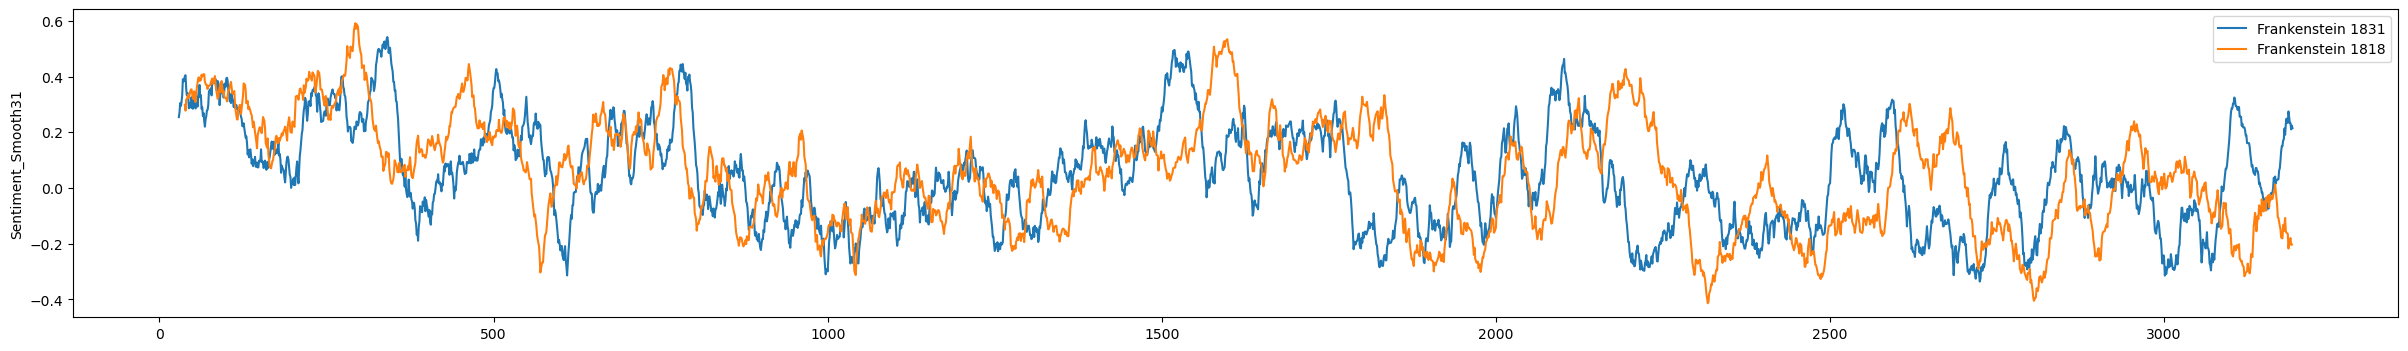

In [54]:
plt.figure(figsize=(30, 4))
sns.lineplot(x=sentence_lev_df2.index.to_list(), y='Sentiment_Smooth31', data=sentence_lev_df2, label = 'Frankenstein 1831')
sns.lineplot(x=sentence_lev_df3.index.to_list(), y='Sentiment_Smooth18', data=df3, label = 'Frankenstein 1818')